In [1]:
# imports
from solvers import *
from solve_to import *
from shooting import *

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# define a simple ODE
def ode(Y, t, args = ()):
    x, y = Y
    return np.array([y, -x])

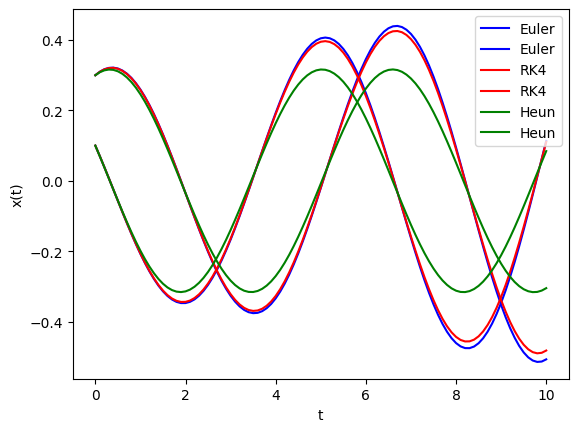

In [3]:
# testing solve_to and solvers

# run each method
def test_solvers():
    # define the initial conditions
    y0 = [0.3, 0.1]
    t0 = 0
    delta_t = 0.1

    # define the final time
    t1 = 10

    # solve the ODE
    Y_euler, t_e = solve_to(ode, y0, t0, t1, delta_t, 'Euler')
    Y_rk4, t_r = solve_to(ode, y0, t0, t1, delta_t, 'RK4')
    Y_lw, t_l = solve_to(ode, y0, t0, t1, delta_t, 'Heun')

    # plot the solution
    plt.plot(t_e, Y_euler, 'b', label='Euler')
    plt.plot(t_r, Y_rk4, 'r', label='RK4')
    plt.plot(t_l, Y_lw, 'g', label='Heun')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend(loc='best')
    plt.show()

# test the solvers
test_solvers()

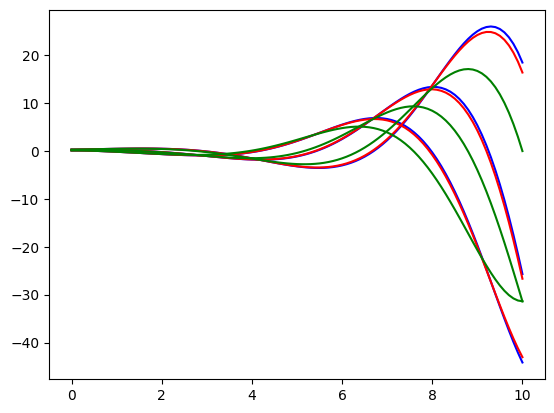

In [4]:
# Test euler step for 3 ode's
def ode3(Y, t, args = ()):
    x, y, z = Y
    return np.array([y, z, -x]) 

# define the initial conditions
y0 = [0.3, 0.1, 0.2]
t0 = 0
delta_t = 0.1

# define the final time
t1 = 10

# solve the ODE
Y_euler, t_e = solve_to(ode3, y0, t0, t1, delta_t, 'Euler')
Y_rk4, t_r = solve_to(ode3, y0, t0, t1, delta_t, 'RK4')
Y_lw, t_l = solve_to(ode3, y0, t0, t1, delta_t, 'Heun')

# plot the solution
plt.plot(t_e, Y_euler, 'b', label='Euler')
plt.plot(t_r, Y_rk4, 'r', label='RK4')
plt.plot(t_l, Y_lw, 'g', label='Heun')





Find the difference in behaviour for the predator prey equations.

KeyboardInterrupt: 

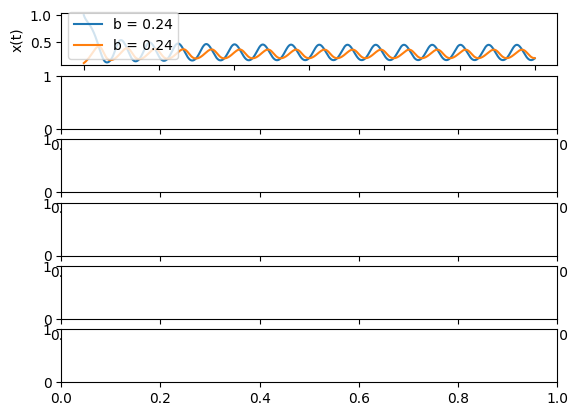

In [5]:
# shooting
a = 1
d = 0.1
b = 0.2

def ode(Y, t, args = (a, b, d)):
    x, y = Y
    return np.array([x*(1-x) - (a*x*y)/(d+x) , b*y*(1- (y/x))])

b_vals = np.linspace(0.24, 0.29, 6)
fig, ax = plt.subplots(len(b_vals), 1)

for i, b in enumerate(b_vals):
    Y, t = solve_to(ode, [1, 0.1], 0, 300, 0.01, 'RK4')
    # For each plot, plot y1(t) and y2(t) on the same plot against t
    ax[i].plot(t, Y, label='b = %.2f' %(b))
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('x(t)')
    ax[i].legend(loc='best')

plt.show()

In [ ]:
# define new ode
a = 1
d = 0.1
b = 0.1

def ode(Y, t, args = (a, b, d)):
    a, b, d = args
    x, y = Y
    return np.array([x*(1-x) - (a*x*y)/(d+x) , b*y*(1- (y/x))])

This script aims to find the starting condition that finds a dy/dt gradient = 0 at t = 100 using the shooting method. By starting with an initial guess and then using the error to scale the guess to approach the solution to a certain tolerance.

This can be achieve much simpler using a shooting function that is built on the fsolve function:

[ 0.52361293  0.20186464 20.        ]
[ 0.52361293  0.20186464 20.        ]
[ 0.52361293  0.20186464 20.        ]
[ 0.52361294  0.20186464 20.        ]
[ 0.52361293  0.20186464 20.        ]
[ 0.52361293  0.20186464 20.0000003 ]
[ 0.03981648  0.13422949 25.71165595]
[ 0.27500622  0.16171629 26.61003523]
[ 0.16223304  0.19326903 23.02780642]
[ 0.17235043  0.16885805 26.55124677]
[ 0.12191464  0.14848689 27.17683823]
[ 0.06851458  0.12810879 28.61580837]
[ 0.04974455  0.13768038 30.5062367 ]
[ 0.12191464  0.14848689 27.17683823]
[ 0.12191464  0.14848689 27.17683823]
[ 0.12191464  0.14848689 27.17683863]
[ 0.07964118  0.14340573 27.75269157]
[ 0.10209854  0.14544005 27.58652369]
[ 0.06835585  0.14406278 28.92829841]
[ 0.09151629  0.1435829  28.46310954]
[ 0.06252534  0.13825671 29.9408848 ]
[ 0.07802998  0.14282123 29.27088486]
[ 0.05647837  0.14111475 31.03883351]
[ 0.04420693  0.13843088 34.37004531]
[ 0.04288157  0.13653885 33.58514066]
[ 0.04012571  0.13450837 33.8827328 ]
[ 0.03901732

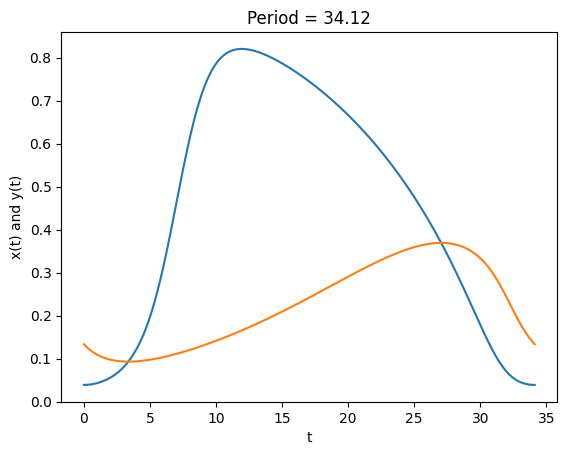

In [ ]:
# test shooting function

# get the starting conditions and period
sol = shooting(ode, [0.5, 1], 20)

# solve for that starting condition
Y, t = solve_to(ode, sol[:-1], 0, sol[-1], 0.01, 'RK4')

# plot the solution
plt.plot(t, Y)
plt.xlabel('t')
plt.ylabel('x(t) and y(t)')
plt.title('Period = %.2f' %(sol[-1]))
plt.show()

In [ ]:
# test shooting with Hopf bifurcation a = -1
# params:
a = -1
b = 2
def test_ode(Y, t, args = (a,b)):
    a, b = args
    x, y = Y
    dxdt = b*x - y + a*x*(x**2 + y**2)
    dydt = x + b*y + a*y*(x**2 + y**2)
    return np.array([dxdt, dydt])

# define true solution
def true_sol(t, args = (a,b)):
    a, b = args
    x_t = np.sqrt(b) * np.cos(t)
    y_t = np.sqrt(b) * np.sin(t)

    return np.array([x_t, y_t])

# initial guess
Y0 = [0,11]
T = 5

[0.01153992 0.01088489 5.        ]
[0.01153992 0.01088489 5.        ]
[0.01153992 0.01088489 5.        ]
[0.01153992 0.01088489 5.        ]
[0.01153992 0.01088489 5.        ]
[0.01153992 0.01088489 5.00000007]
[ 1.95459252  0.94828614 46.09702744]
[ 0.64066801  0.16647991 25.49599507]
[ 0.65310631  0.07815414 29.45878489]
[ 0.57529391  0.03150811 29.8055985 ]
[ 0.64066802  0.16647991 25.49599507]
[ 0.64066801  0.16647991 25.49599507]
[ 0.64066801  0.16647991 25.49599545]
[ 0.83876521  0.13469053 25.17506304]
[1.21703955e+00 6.61918279e-03 2.53206234e+01]
[ 1.56648867e+00 -6.27621689e-03  2.50860303e+01]
[ 1.44496086e+00 -6.90514531e-03  2.51264819e+01]
[ 1.41896453e+00 -6.94625532e-03  2.51316152e+01]
[ 1.41585383e+00 -6.97572101e-03  2.51323691e+01]
[ 1.41593561e+00 -6.96000491e-03  2.51323252e+01]
[ 1.41592711e+00 -6.96032829e-03  2.51323356e+01]
[ 1.41593026e+00 -6.96030159e-03  2.51323357e+01]
[ 1.41593420e+00 -6.96023771e-03  2.51323347e+01]
[ 1.41593334e+00 -6.96025178e-03  2.513

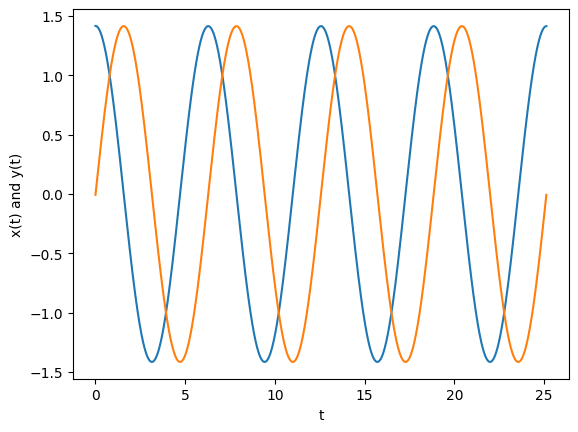

True solution at end of period:  [ 1.41421345e+00 -5.74602298e-04]
Solution at end of period:  [ 1.41416085 -0.00693384]


In [ ]:
sol = shooting(test_ode,Y0, T)
print('Starting conditions : ' , sol)
# test that the solution is correct
Y, t = solve_to(test_ode, sol[:-1], 0, sol[-1], 0.01, 'Heun')

# plot the solution
plt.plot(t, Y)
plt.xlabel('t')
plt.ylabel('x(t) and y(t)')
plt.show()


Y_true = true_sol(t[-1])

print('True solution at end of period: ', Y_true)
print('Solution at end of period: ', Y[-1])


/var/folders/4d/1cd5pk9s6f7_prxws19jm1fw0000gn/T/ipykernel_22783/1099210669.py:11: RuntimeWarning: overflow encountered in scalar multiply
  dxdt = b*x - y + a*x*(x**2 + y**2)
/var/folders/4d/1cd5pk9s6f7_prxws19jm1fw0000gn/T/ipykernel_22783/1099210669.py:12: RuntimeWarning: overflow encountered in scalar multiply
  dydt = x + b*y + a*y*(x**2 + y**2)
/var/folders/4d/1cd5pk9s6f7_prxws19jm1fw0000gn/T/ipykernel_22783/1099210669.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  dxdt = b*x - y + a*x*(x**2 + y**2)
/var/folders/4d/1cd5pk9s6f7_prxws19jm1fw0000gn/T/ipykernel_22783/1099210669.py:12: RuntimeWarning: invalid value encountered in scalar multiply
  dydt = x + b*y + a*y*(x**2 + y**2)


[       nan        nan 6.28318531]
[       nan        nan 6.28318531]
[       nan        nan 6.28318531]
[       nan        nan 6.28318531]
[       nan        nan 6.28318531]
[      nan       nan 6.2831854]
[nan nan nan]
[nan nan nan]
[       nan        nan 6.28318531]
[       nan        nan 6.28318531]
[      nan       nan 6.2831854]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[       nan        nan 6.28318531]
[       nan        nan 6.28318531]
[       nan        nan 6.28318531]
[       nan        nan 6.28318531]
[       nan        nan 6.28318531]
[      nan       nan 6.2831854]
[nan nan nan]
[nan nan nan]
[       nan        nan 6.28318531]
[       nan        nan 6.28318531]
[      nan       nan 6.2831854]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[       nan        nan 6.28318531]
[       nan        nan 6.28318531]
[       nan        nan 6.2831853

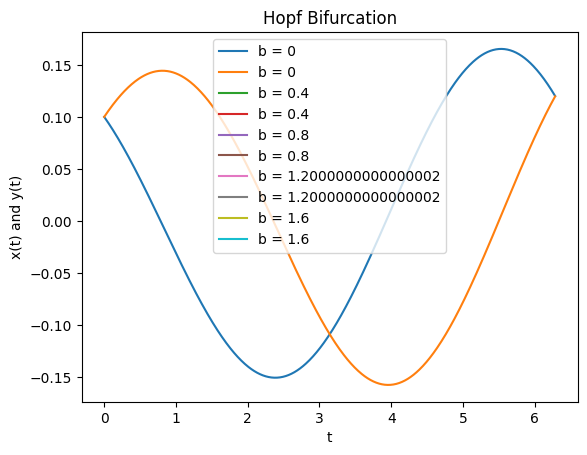

In [ ]:
# basic numerical continuation

# define the starting parameter value
a = 1
b = 0

# define the function to be integrated
def hopf_bifurcation(Y, t, args = (a, b)):
    a, b = args
    x, y = Y
    dxdt = b*x - y + a*x*(x**2 + y**2)
    dydt = x + b*y + a*y*(x**2 + y**2)
    return np.array([dxdt, dydt])


# define the initial conditions
Y0 = np.array([0.1, 0.1])

# define the parameter increment
db = 0.4

while b < 2:
    # run shooting method to find the solution
    sol = shooting(hopf_bifurcation, Y0, 2*np.pi)

    # unpack the solution
    Y = sol[:-1]
    T = sol[-1]

    # get solution
    y, t = solve_to(hopf_bifurcation, Y0, 0, T, 0.01, 'RK4')

    # plot the solution
    plt.plot(t, y, label = 'b = {}'.format(b))

    # increment the parameter
    b += db

    # set the initial conditions to the previous solution
    Y0 = Y

# plot the solution
plt.legend()
plt.title('Hopf Bifurcation')
plt.xlabel('t')
plt.ylabel('x(t) and y(t)')
plt.show()